# Data Science Pipeline Tutorial: College Data

### In this tutorial, we want to run through the data science pipeline from collecting data, cleaning and parsing it, performing exploratory data analysis, hypothesis testing, and machine learning.

This tutorial is designed in python, using a custom dataset adapted from the U.S. Department of Education's College Scorecard. To download the full dataset and documentation, visit https://collegescorecard.ed.gov/data/. We will be focusing on data from the Most Recent Data by Field of Study table in order to learn information about different universities' revenue, tuition costs, racial diversity, and more through the use of the data science pipeline.

## Setup
First, we import the libraries we want to use. We will be using a pandas dataframe to represent and manipulate the data, so we import the pandas library. Matplotlib and seaborn are both useful for plotting data visually, and folium is great for mapping.

In [20]:
!pip install folium
import pandas as pd
import matplotlib.pyplot as plt
import folium
import seaborn as sns

## Loading and Viewing Data

Next, we extract the data from online by using pandas's read_csv() function and the url we use to access the data. If your data is stored locally, read_csv() also works on the path to the file where your data is stored.

We've uploaded the data that we'll be using onto a csv file on github, so we're going to import from that url.

In [21]:
url = 'https://raw.githubusercontent.com/aakayan/320_College_Data_Tutorial/main/data.txt'
df = pd.read_csv(url) # Read the data
df.head() # View the data

Unnamed: 0  unit_id                            inst_name        city state  \
0           0   100654             Alabama A & M University      Normal    AL   
1           1   100663  University of Alabama at Birmingham  Birmingham    AL   
2           2   100690                   Amridge University  Montgomery    AL   
3           3   100706  University of Alabama in Huntsville  Huntsville    AL   
4           4   100724             Alabama State University  Montgomery    AL   

          zip                                        accred_inst  \
0       35762  Southern Association of Colleges and Schools C...   
1  35294-0110  Southern Association of Colleges and Schools C...   
2  36117-3553  Southern Association of Colleges and Schools C...   
3       35899  Southern Association of Colleges and Schools C...   
4  36104-0271  Southern Association of Colleges and Schools C...   

                    inst_url  \
0              www.aamu.edu/   
1        https://www.uab.edu   
2  www.amridgeuniversity.edu   
3                www.uah.edu   
4              www.alasu.edu   

                                      net_price_calc  height_cash_monitoring  \
0  www.aamu.edu/admissions-aid/tuition-fees/net-p...                       0   
1   https://uab.studentaidcalculator.com/survey.aspx                       0   
2                   www2.amridgeuniversity.edu:9091/                       0   
3                                    finaid.uah.edu/                       0   
4  www.alasu.edu/cost-aid/tuition-costs/net-price...                       0   

    latitude  longitude  hbcu  pbi  ANNHI  tribal  AANAPII  hisp_serving_inst  \
0  34.783368 -86.568502   1.0  0.0    0.0     0.0      0.0                0.0   
1  33.505697 -86.799345   0.0  0.0    0.0     0.0      0.0                0.0   
2  32.362609 -86.174010   0.0  1.0    0.0     0.0      0.0                0.0   
3  34.724557 -86.640449   0.0  0.0    0.0     0.0      0.0                0.0   
4  32.364317 -86.295677   1.0  0.0    0.0     0.0      0.0                0.0   

   NANTI  men_only  women_only  adm_rate  adm_rate_all  sat_vr_25pct  \
0    0.0       0.0         0.0    0.8986        0.8986         430.0   
1    0.0       0.0         0.0    0.9211        0.9211         490.0   
2    0.0       0.0         0.0       NaN           NaN           NaN   
3    0.0       0.0         0.0    0.8087        0.8087         560.0   
4    0.0       0.0         0.0    0.9774        0.9774         440.0   

   sat_vr_75pct  sat_mt_25pct  sat_mt_75pct  sat_wr_25pct  sat_wr_75pct  \
0         520.0         420.0         510.0         370.0         457.0   
1         620.0         490.0         620.0           NaN           NaN   
2           NaN           NaN           NaN           NaN           NaN   
3         700.0         450.0         680.0           NaN           NaN   
4         520.0         420.0         510.0           NaN           NaN   

   sat_vr_mid  sat_mt_mid  sat_wr_mid  act_cm_25pct  act_cm_75pct  \
0       475.0       465.0       414.0          16.0          19.0   
1       555.0       555.0         NaN          21.0          29.0   
2         NaN         NaN         NaN           NaN           NaN   
3       630.0       565.0         NaN          25.0          31.0   
4       480.0       465.0         NaN          16.0          20.0   

   act_en_25pct  act_en_75pct  act_mt_25pct  act_mt_75pct  act_wr_25pct  \
0          14.0          20.0          15.0          18.0           NaN   
1          22.0          31.0          19.0          26.0           NaN   
2           NaN           NaN           NaN           NaN           NaN   
3          25.0          34.0          24.0          30.0           NaN   
4          14.0          20.0          15.0          18.0           NaN   

   act_wr_75pct  act_cm_mid  act_en_mid  act_mt_mid  act_wr_mid  sat_avg  \
0           NaN        18.0        17.0        17.0         NaN    957.0   
1           NaN        25.0        27.0     

This data is now loaded into our dataframe, df. A pandas dataframe is a 2-dimenstional structure that stores data, like a spreadsheet. With dataframes, pandas gives us many ways to interact with our data. This dataframe has each row representing a university, and each column representing one attribute of the university, such as its name, latitude and logitude, website url, and more.

However, it turns out we can't view all of the data. Let's change up some settings in pandas to view all the columns.

In [22]:
pd.options.display.max_columns = None # Removes the limit on the maximum columns you can view
df.head() # View the data again

Unnamed: 0  unit_id                            inst_name        city state  \
0           0   100654             Alabama A & M University      Normal    AL   
1           1   100663  University of Alabama at Birmingham  Birmingham    AL   
2           2   100690                   Amridge University  Montgomery    AL   
3           3   100706  University of Alabama in Huntsville  Huntsville    AL   
4           4   100724             Alabama State University  Montgomery    AL   

          zip                                        accred_inst  \
0       35762  Southern Association of Colleges and Schools C...   
1  35294-0110  Southern Association of Colleges and Schools C...   
2  36117-3553  Southern Association of Colleges and Schools C...   
3       35899  Southern Association of Colleges and Schools C...   
4  36104-0271  Southern Association of Colleges and Schools C...   

                    inst_url  \
0              www.aamu.edu/   
1        https://www.uab.edu   
2  www.amridgeuniversity.edu   
3                www.uah.edu   
4              www.alasu.edu   

                                      net_price_calc  height_cash_monitoring  \
0  www.aamu.edu/admissions-aid/tuition-fees/net-p...                       0   
1   https://uab.studentaidcalculator.com/survey.aspx                       0   
2                   www2.amridgeuniversity.edu:9091/                       0   
3                                    finaid.uah.edu/                       0   
4  www.alasu.edu/cost-aid/tuition-costs/net-price...                       0   

    latitude  longitude  hbcu  pbi  ANNHI  tribal  AANAPII  hisp_serving_inst  \
0  34.783368 -86.568502   1.0  0.0    0.0     0.0      0.0                0.0   
1  33.505697 -86.799345   0.0  0.0    0.0     0.0      0.0                0.0   
2  32.362609 -86.174010   0.0  1.0    0.0     0.0      0.0                0.0   
3  34.724557 -86.640449   0.0  0.0    0.0     0.0      0.0                0.0   
4  32.364317 -86.295677   1.0  0.0    0.0     0.0      0.0                0.0   

   NANTI  men_only  women_only  adm_rate  adm_rate_all  sat_vr_25pct  \
0    0.0       0.0         0.0    0.8986        0.8986         430.0   
1    0.0       0.0         0.0    0.9211        0.9211         490.0   
2    0.0       0.0         0.0       NaN           NaN           NaN   
3    0.0       0.0         0.0    0.8087        0.8087         560.0   
4    0.0       0.0         0.0    0.9774        0.9774         440.0   

   sat_vr_75pct  sat_mt_25pct  sat_mt_75pct  sat_wr_25pct  sat_wr_75pct  \
0         520.0         420.0         510.0         370.0         457.0   
1         620.0         490.0         620.0           NaN           NaN   
2           NaN           NaN           NaN           NaN           NaN   
3         700.0         450.0         680.0           NaN           NaN   
4         520.0         420.0         510.0           NaN           NaN   

   sat_vr_mid  sat_mt_mid  sat_wr_mid  act_cm_25pct  act_cm_75pct  \
0       475.0       465.0       414.0          16.0          19.0   
1       555.0       555.0         NaN          21.0          29.0   
2         NaN         NaN         NaN           NaN           NaN   
3       630.0       565.0         NaN          25.0          31.0   
4       480.0       465.0         NaN          16.0          20.0   

   act_en_25pct  act_en_75pct  act_mt_25pct  act_mt_75pct  act_wr_25pct  \
0          14.0          20.0          15.0          18.0           NaN   
1          22.0          31.0          19.0          26.0           NaN   
2           NaN           NaN           NaN           NaN           NaN   
3          25.0          34.0          24.0          30.0           NaN   
4          14.0          20.0          15.0          18.0           NaN   

   act_wr_75pct  act_cm_mid  act_en_mid  act_mt_mid  act_wr_mid  sat_avg  \
0           NaN        18.0        17.0        17.0         NaN    957.0   
1           NaN        25.0        27.0     

## Missing Data
In this data, you can see that some values in some columns are listed as "NaN", meaning "Not a Number". This means that there is missing data for this column from the selected university. There are many ways to deal with missing data, such as trying to fill in reasonable values or simply removing the associated row or column. In order to best determine what to do about missing data, let us first evaluate which columns have the most missing data.

In [23]:
missing_count_df = pd.DataFrame(df.isna().sum(),columns=["Missing Values"]) # Creating a new dataframe by summing how many values in each column are missing
missing_count_df[(missing_count_df.T != 0).any()] # Switching around rows and columns for easier viewing
missing_count_df.sort_values(by=["Missing Values"], ascending=False).head(10) # Viewing the top 10 columns with the most missing data

Missing Values
blackNH_ugds            3431
whiteNH_ugds            3431
act_wr_75pct            3112
act_wr_mid              3112
act_wr_25pct            3112
sat_wr_75pct            2707
sat_wr_25pct            2707
sat_wr_mid              2707
act_en_25pct            2243
act_en_75pct            2243

The columns missing the most data are the columns for number of Black, non-hispanic undergraduates, the number of White non-hispanic undergraduates, as well as statistics about mean SAT and ACT section scores. 

This could be for various reasons. For example, the dataframe already has columns for Black students, White students, and Hispanic students, so likely they did not also count the overlapping Black and Hispanic or White and Hispanic students. Instead, they kept them separated. As a result, they also did not categorize the Black Non-Hispanic and White Non-Hispanic students. In this case, we do not know how to estimate how many of the Black and White students are not Hispanic, so we will opt to simply drop these columns.

The SAT and ACT sections may be missing data due to factors like test-optionality when students are applying, a lack of separating out the various scores once they are collected, or other reasons. We will opt to remove these columns too.

The last column we want to delete is 'Unnamed: 0', which is an indexing of the rows. There's no need for that since the dataframe tracks rows on its own, so we'll drop that column as well.

Dropping columns is quite simple when you know the names of the target columns.

In [24]:
drop_cols = ['blackNH_ugds','whiteNH_ugds', 'act_wr_75pct', 'act_wr_mid', 'act_wr_25pct', 'sat_wr_25pct', 'sat_wr_mid', 'sat_wr_75pct', 'act_en_25pct', 'act_en_75pct', 'act_mt_mid', 'act_en_mid', 'act_mt_75pct', 'act_mt_25pct', 'sat_vr_75pct', 'sat_vr_25pct', 'sat_vr_mid', 'sat_mt_mid', 'sat_mt_25pct', 'sat_mt_75pct', 'act_cm_75pct', 'act_cm_25pct', 'act_cm_mid', 'sat_avg', 'sat_avg_all', 'Unnamed: 0']
df = df.drop(columns=drop_cols)
display(df)

unit_id                                          inst_name         city  \
0      100654                           Alabama A & M University       Normal   
1      100663                University of Alabama at Birmingham   Birmingham   
2      100690                                 Amridge University   Montgomery   
3      100706                University of Alabama in Huntsville   Huntsville   
4      100724                           Alabama State University   Montgomery   
...       ...                                                ...          ...   
3426   491710                       Yeshiva Gedolah of Cliffwood      Keyport   
3427   491765                              Yeshivas Emek Hatorah       Howell   
3428   491817                                Seminary Bnos Chaim     Lakewood   
3429   492801  Drury University-College of Continuing Profess...  Springfield   
3430   492962  Indiana Institute of Technology-College of Pro...   Fort Wayne   

     state         zip                                        accred_inst  \
0       AL       35762  Southern Association of Colleges and Schools C...   
1       AL  35294-0110  Southern Association of Colleges and Schools C...   
2       AL  36117-3553  Southern Association of Colleges and Schools C...   
3       AL       35899  Southern Association of Colleges and Schools C...   
4       AL  36104-0271  Southern Association of Colleges and Schools C...   
...    ...         ...                                                ...   
3426    NJ  07735-5105  Association of Advanced Rabbinical and Talmudi...   
3427    NJ  07731-2444      Association of Institutions of Jewish Studies   
3428    NJ  08701-2336      Association of Institutions of Jewish Studies   
3429    MO       65802                         Higher Learning Commission   
3430    IN       46803                         Higher Learning Commission   

                                 inst_url  \
0                           www.aamu.edu/   
1                     https://www.uab.edu   
2               www.amridgeuniversity.edu   
3                             www.uah.edu   
4                           www.alasu.edu   
...                                   ...   
3426  https://yeshivagedolahcliffwood.com   
3427              yeshivasemekhatorah.com   
3428            www.seminarybnoschaim.com   
3429                  www.drury.edu/ccps/   
3430                 cps.indianatech.edu/   

                                         net_price_calc  \
0     www.aamu.edu/admissions-aid/tuition-fees/net-p...   
1      https://uab.studentaidcalculator.com/survey.aspx   
2                      www2.amridgeuniversity.edu:9091/   
3                                       finaid.uah.edu/   
4     www.alasu.edu/cost-aid/tuition-costs/net-price...   
...                                                 ...   
3426  https://yeshivagedolahcliffwood.com/wp-content...   
3427                     yeshivasemekhatorah.com/links/   
3428  seminarybnoschaim.com/wp-content/uploads/Net%2...   
3429  tcc.ruffalonl.com/Drury%20University/Freshman-...   
3430                         cps.indianatech.edu/costs/   

      height_cash_monitoring   latitude  longitude  hbcu  pbi  ANNHI  tribal  \
0                          0  34.783368 -86.568502   1.0  0.0    0.0     0.0   
1                          0  33.505697 -86.799345   0.0  0.0    0.0     0.0   
2                          0  32.362609 -86.174010   0.0  1.0    0.0     0.0   
3                          0  34.724557 -86.640449   0.0  0.0    0.0     0.0   
4                          0  32.364317 -86.295677   1.0  0.0    0.0     0.0   
...                      ...        ...        ...   ...  ...    ...     ...   
3426                       0  40.442213 -74.224235   0.0  0.0    0.0     0.0   
3427                       0  40.112501 -74.232083   0.0  0.0    0.0     0.0   
3428                       0  40.098481 -74.246731   0.0  0.0    0.0     0.0   
3429                       0  37.218523 -93.286693   0.0  

## Exploratory Data Analysis

There are about 3400 rows in our dataframe currently, which means there are a lot of Universities to look at. Here we can see them all mapped using the folium library, with a dot marker for each university.

In [25]:
m = folium.Map(location=[30, -95], zoom_start=3.5) # Create a map in Folium


for r in df.iterrows(): # Perform the following for each row in the dataframe--
    if(not pd.isna(r[1].latitude) and not pd.isna(r[1].longitude)): # If lat and long exist
        m.add_child(folium.CircleMarker(location=[r[1].latitude, r[1].longitude], fill='true', radius=3, popup='Hi', fill_color='blue', color='clear', fill_opacity=1)) # Create dot marker and add it to map

m # Display the map with the new markers

Since we want to explore the relationships between different attributes of these universities, we have to first do some additional analysis. One thing we can do is create a correlation matrix that shows whether two variables are closely related, not seemingly related, or even negatively correlated. The darker colors show a strong correlation, and the lighter colors show a weaker correlation, or even a negative correlation.

[Text(0, 0.5, 'unit_id'),
 Text(0, 1.5, 'height_cash_monitoring'),
 Text(0, 2.5, 'latitude'),
 Text(0, 3.5, 'longitude'),
 Text(0, 4.5, 'hbcu'),
 Text(0, 5.5, 'pbi'),
 Text(0, 6.5, 'ANNHI'),
 Text(0, 7.5, 'tribal'),
 Text(0, 8.5, 'AANAPII'),
 Text(0, 9.5, 'hisp_serving_inst'),
 Text(0, 10.5, 'NANTI'),
 Text(0, 11.5, 'men_only'),
 Text(0, 12.5, 'women_only'),
 Text(0, 13.5, 'adm_rate'),
 Text(0, 14.5, 'adm_rate_all'),
 Text(0, 15.5, 'UGDS'),
 Text(0, 16.5, 'white_ugds'),
 Text(0, 17.5, 'black_ugds'),
 Text(0, 18.5, 'hisp_ugds'),
 Text(0, 19.5, 'asian_ugds'),
 Text(0, 20.5, 'AIAN_ugds'),
 Text(0, 21.5, 'NHPI_ugds'),
 Text(0, 22.5, 'birac_ugds'),
 Text(0, 23.5, 'non_res_alien_ugds'),
 Text(0, 24.5, 'unkn_ugds'),
 Text(0, 25.5, 'title4_stud_pub'),
 Text(0, 26.5, 'title4_stud_priv'),
 Text(0, 27.5, 'atnd_cost_acad_yr'),
 Text(0, 28.5, 'in_st_tuition'),
 Text(0, 29.5, 'out_st_tuition'),
 Text(0, 30.5, 'net_tuition_rev_per_fts'),
 Text(0, 31.5, 'inst_expend_per_fts'),
 Text(0, 32.5, 'avg_fac_

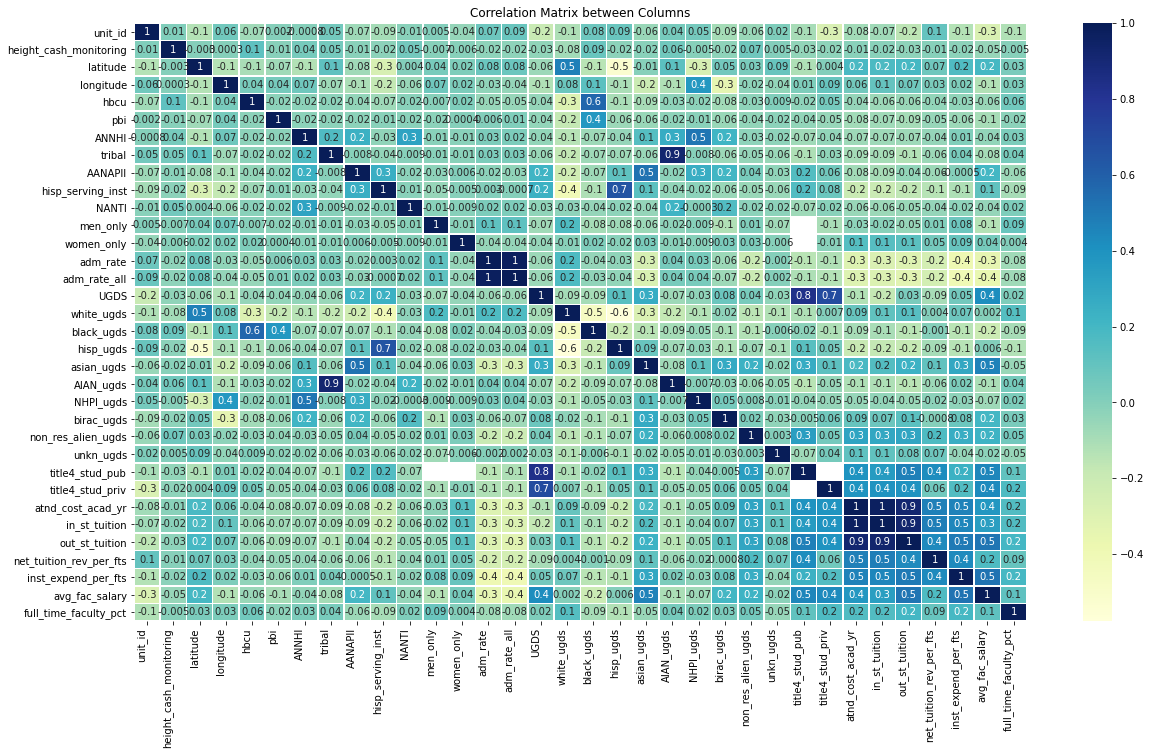

In [27]:
# Correlation Matrix
plt.subplots(figsize = (20,11))
g = sns.heatmap(df.corr(), annot = True, cmap = "YlGnBu", fmt = '.1g', linewidths=.5,)

g.set_title("Correlation Matrix between Columns")
g.set_xticklabels(g.get_xticklabels(), rotation=90, horizontalalignment='right')
g.set_yticklabels(g.get_yticklabels(), horizontalalignment='right')

Some unsurprising obeservations we can make from this correlation matrix is that tuition rates are somewhat correlated with the revenue per student, and they are somewhat negatively correlated with admission rate.

This data seems correlated to the average faculty salary as well, but the direct linear correlation coefficient is lower. Further data analysis can reveal insights about the relationship between average faculty salary, cost of attendance, instructional expenditures,  and net revenue.

## Hypothesis Testing

To see where the university spends their money, we made a new dataframe with only the relevant data that we will be using for financial analysis and mapping. These columns are:

* State: The state that the university is located in
* Name: The name of the university
* Latitude + Longitude: The geographic coordinates of the university
* Attendance Cost: The average cost of attendance per academic year
* Net Revenue: Net tuition revenue per full-time student
* Faculty Salary: Average faculty salary at the university
* Full Time Faculty Percent: Percent of faculty that is employed full-time
* Instructional Expenditure: Instructional expenditures per full-time student
&nbsp;

&nbsp;

In order to guage how much money each institution had to allocate to various sources, we created a gross revenue column. This new gross revenue value was the sum of the net tuition revenue, the faculty salary, and the istructional expenditure per full time student. As a disclaimer, this does not include the salaries of non-facultative staff or facility expenditures. This data was unavailable.

In [39]:
df.head()

unit_id                            inst_name        city state         zip  \
0   100654             Alabama A & M University      Normal    AL       35762   
1   100663  University of Alabama at Birmingham  Birmingham    AL  35294-0110   
2   100690                   Amridge University  Montgomery    AL  36117-3553   
3   100706  University of Alabama in Huntsville  Huntsville    AL       35899   
4   100724             Alabama State University  Montgomery    AL  36104-0271   

                                         accred_inst  \
0  Southern Association of Colleges and Schools C...   
1  Southern Association of Colleges and Schools C...   
2  Southern Association of Colleges and Schools C...   
3  Southern Association of Colleges and Schools C...   
4  Southern Association of Colleges and Schools C...   

                    inst_url  \
0              www.aamu.edu/   
1        https://www.uab.edu   
2  www.amridgeuniversity.edu   
3                www.uah.edu   
4              www.alasu.edu   

                                      net_price_calc  height_cash_monitoring  \
0  www.aamu.edu/admissions-aid/tuition-fees/net-p...                       0   
1   https://uab.studentaidcalculator.com/survey.aspx                       0   
2                   www2.amridgeuniversity.edu:9091/                       0   
3                                    finaid.uah.edu/                       0   
4  www.alasu.edu/cost-aid/tuition-costs/net-price...                       0   

    latitude  longitude  hbcu  pbi  ANNHI  tribal  AANAPII  hisp_serving_inst  \
0  34.783368 -86.568502   1.0  0.0    0.0     0.0      0.0                0.0   
1  33.505697 -86.799345   0.0  0.0    0.0     0.0      0.0                0.0   
2  32.362609 -86.174010   0.0  1.0    0.0     0.0      0.0                0.0   
3  34.724557 -86.640449   0.0  0.0    0.0     0.0      0.0                0.0   
4  32.364317 -86.295677   1.0  0.0    0.0     0.0      0.0                0.0   

   NANTI  men_only  women_only  adm_rate  adm_rate_all     UGDS  white_ugds  \
0    0.0       0.0         0.0    0.8986        0.8986   4990.0      0.0186   
1    0.0       0.0         0.0    0.9211        0.9211  13186.0      0.5717   
2    0.0       0.0         0.0       NaN           NaN    351.0      0.2393   
3    0.0       0.0         0.0    0.8087        0.8087   7458.0      0.7167   
4    0.0       0.0         0.0    0.9774        0.9774   3903.0      0.0167   

   black_ugds  hisp_ugds  asian_ugds  AIAN_ugds  NHPI_ugds  birac_ugds  \
0      0.9120     0.0088      0.0018     0.0022     0.0016      0.0118   
1      0.2553     0.0334      0.0633     0.0034     0.0002      0.0457   
2      0.7151     0.0171      0.0057     0.0057     0.0000      0.0000   
3      0.0969     0.0528      0.0381     0.0095     0.0008      0.0296   
4      0.9352     0.0095      0.0041     0.0013     0.0005      0.0102   

   non_res_alien_ugds  unkn_ugds  title4_stud_pub  title4_stud_priv  \
0              0.0070     0.0361            592.0               NaN   
1              0.0213     0.0058           1229.0               NaN   
2              0.0000     0.0171              NaN               5.0   
3              0.0223     0.0333            585.0               NaN   
4              0.0102     0.0123            523.0               NaN   

   atnd_cost_acad_yr  in_st_tuition  out_st_tuition  net_tuition_rev_per_fts  \
0            22489.0         9744.0         18354.0                   7413.0   
1            24347.0         8568.0         19704.0                  13177.0   
2            17680.0         6900.0          6900.0                  14273.0   
3            23441.0        10714.0         22362.0                   8677.0   
4            21476.0        11068.0         19396.0                  10160.0   

   inst_expend_per_fts  avg_fac_salary  full_time_faculty_pct  
0               5384.0          7101.0                 0.7411  
1              16454.0         10717.0                 0.7766 

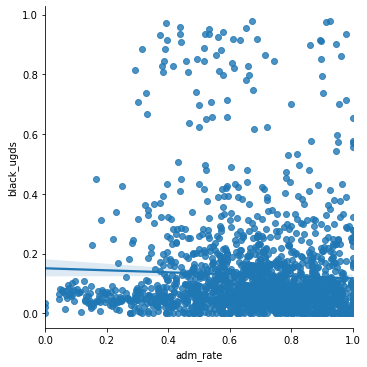

In [36]:

sns.lmplot(x='adm_rate', y='black_ugds', data=df)

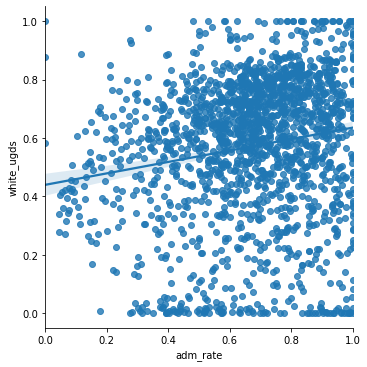

In [38]:
sns.lmplot(x='adm_rate', y='white_ugds', data=df)

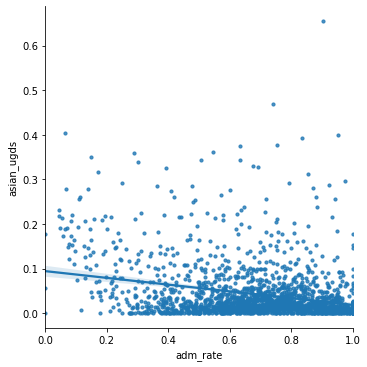

In [45]:
sns.lmplot(x='adm_rate', y='asian_ugds', data=df, scatter_kws={"s": 10})

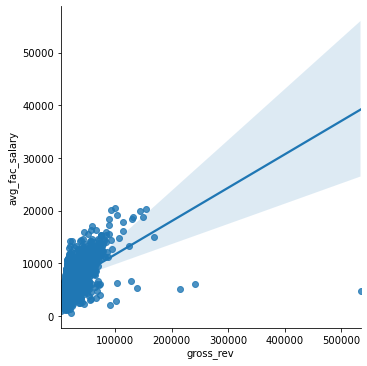

In [41]:
fin_df = df.filter(["state", "inst_name", "latitude", "longitude", "atnd_cost_acad_yr", "net_tuition_rev_per_fts", "avg_fac_salary", "full_time_faculty_pct", "inst_expend_per_fts"])
fin_df['gross_rev'] = fin_df['net_tuition_rev_per_fts'] + fin_df["avg_fac_salary"] + fin_df["inst_expend_per_fts"]
sns.lmplot(x='gross_rev',y='avg_fac_salary',data=fin_df,fit_reg=True)

As we can see, the relationship between this new gross revenue variable and the average faculty salary does not appear to follow the line of best fit very well. This means the exact relationship may not be linear. One thing we can do to explore how much of the gross revenue is allocated to faculty salary is create a new variable dividing the average salary by the gross revenue variable to determine what percentage of the revenue is going toward faculty salaries

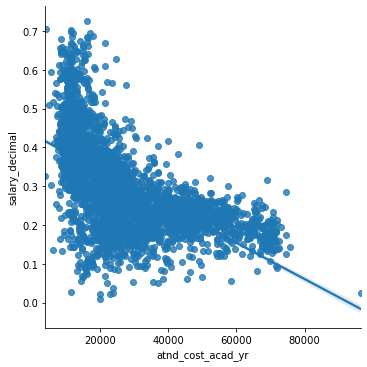

In [29]:
fin_df['salary_decimal'] = fin_df['avg_fac_salary'] / fin_df['gross_rev']
sns.lmplot(x='atnd_cost_acad_yr',y='salary_decimal',data=fin_df,fit_reg=True)

Interestingly enough, it seems that as the cost of attendance increases, the proportion of the gross revenue that is allocated to faculty salary seems to decrease. In fact, this relationship looks like an exponential decay. This could indicate that the rate of increase for the cost of attendance is steeper than the increase in faculty salary. Alternatively, it could also indicate that faculty salary remains steady despite increases in cost of attendance, and that the two factors are unrelated. It could also mean that as the cost of attendance increases, the faculty salary decreases. Further analysis is required to determine which is the case.

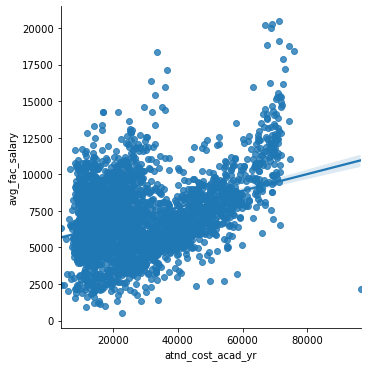

In [26]:
sns.lmplot(x='atnd_cost_acad_yr',y='avg_fac_salary',data=fin_df,fit_reg=True)

We can see from the direct comparison of academic cost per year and average faculty salary that the second and third possibilities mentioned above (steady or decreasing faculty salary despite increasing cost of attendance) are not true, as the average faculty salary does generally seem to increase as the attendance cost per academic year increases.